In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
colors = ["#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0"]

In [32]:
apr_data = pd.read_csv("uber-raw-data-apr14.csv")
may_data = pd.read_csv("uber-raw-data-may14.csv")
jun_data = pd.read_csv("uber-raw-data-jun14.csv")
jul_data = pd.read_csv("uber-raw-data-jul14.csv")
aug_data = pd.read_csv("uber-raw-data-aug14.csv")
sep_data = pd.read_csv("uber-raw-data-sep14.csv")

In [33]:
data = pd.concat([apr_data, may_data, jun_data, jul_data, aug_data, sep_data])

In [34]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [40]:
data['year']=data['Date/Time'].dt.year
data['month']=data['Date/Time'].dt.month
data['day']=data['Date/Time'].dt.day
data['time']=data['Date/Time'].dt.time
data['hour']=data['Date/Time'].dt.hour
data['minute']=data['Date/Time'].dt.minute
data['second']=data['Date/Time'].dt.second

In [60]:
df = data.copy()
df = df.drop('Date/Time', axis=1)
df.head(5)

,Lat,Lon,Base,year,month,day,time,hour,minute,second
0,40.7690,-73.9549,B02512,2014,4,1,00:11:00,0,11,0
1,40.7267,-74.0345,B02512,2014,4,1,00:17:00,0,17,0
2,40.7316,-73.9873,B02512,2014,4,1,00:21:00,0,21,0
3,40.7588,-73.9776,B02512,2014,4,1,00:28:00,0,28,0
4,40.7594,-73.9722,B02512,2014,4,1,00:33:00,0,33,0


<AxesSubplot:>

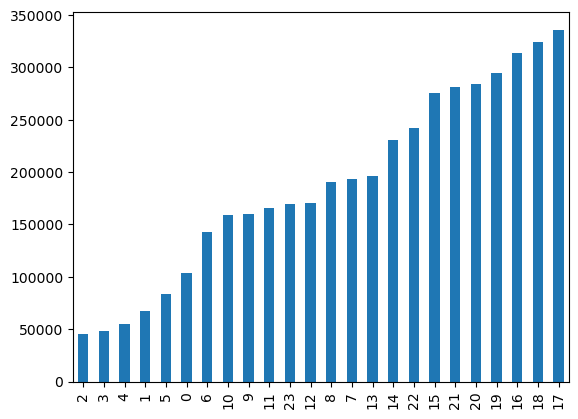

In [57]:
df['hour'].value_counts().sort_values().plot(kind='bar')

In [61]:
df_1000 = df.sample(n=1000, random_state=42)

<AxesSubplot:xlabel='hour', ylabel='month'>

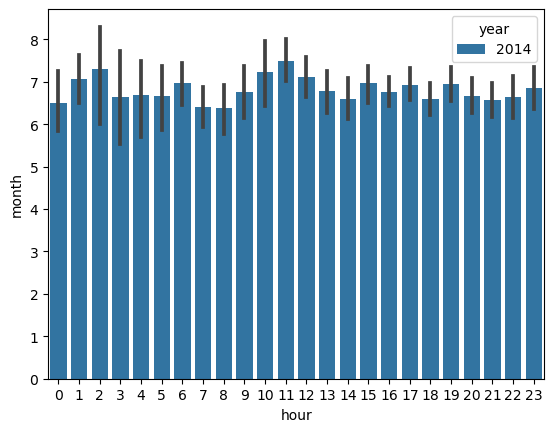

In [70]:
sns.barplot(data=df_1000, x='hour', y='month', hue='year')

In [83]:
df_1000.columns

Index(['Lat', 'Lon', 'Base', 'year', 'month', 'day', 'time', 'hour', 'minute',
       'second'],
      dtype='object')

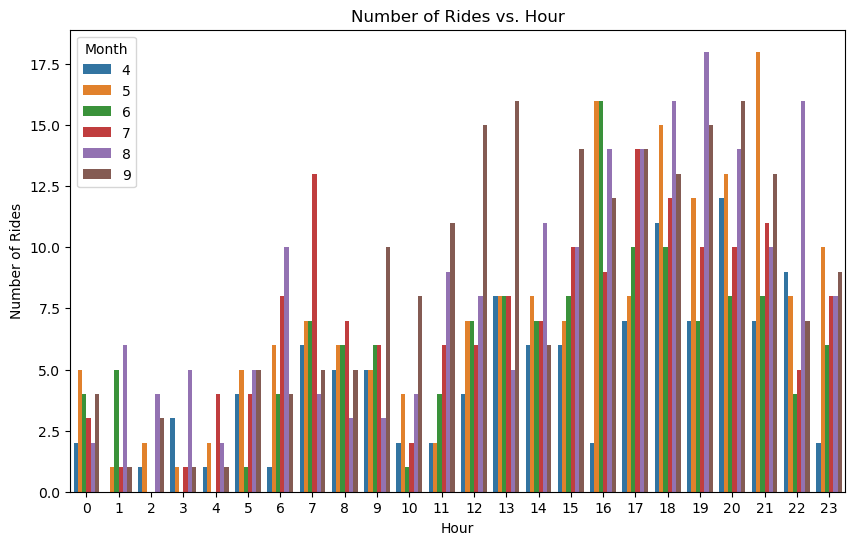

In [98]:
# Group data by 'hour' and count the number of rides for each hour
rides_by_hour = df_1000.groupby(['hour', 'month']).size().reset_index(name='Number of Rides')

# Plot the number of rides versus the hour using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=rides_by_hour, x='hour', y='Number of Rides', hue='month')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs. Hour')
plt.xticks(range(24))  # Assuming hours range from 0 to 23
plt.legend(title='Month', loc='upper left')  # Add a legend to show the month colors
plt.show()